In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crop_recommendation.csv")

In [3]:
df

Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall  
0     202.935536  
1     226.655537  
2     263.964248  
3     242.864034  
4     262.717340  
...          ...  
2195  177.774507  
2196  127.924610  
2197  173.322839  
2198  127.175293  
2199  140.937041  

[2200 rows x 7 columns]

In [4]:
TARGET = "temperature"

X = df.drop(columns=[TARGET])
y = df[TARGET]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
print("Standard Scaled Values (Temperature Model):")
print(pd.DataFrame(X_train_scaled).head(10))

Standard Scaled Values (Temperature Model):
          0         1         2         3         4         5
0 -0.903427 -1.126162 -0.668507  0.936586  0.193474  0.005150
1 -0.367051  0.770359 -0.570590 -0.100470  0.863918 -0.605291
2 -1.171614  0.589738 -0.453089 -0.382775  1.050298 -1.045807
3  1.349349  0.499427 -0.002670  0.157688 -0.599105  0.252872
4 -1.359346 -1.096058 -0.355172 -1.071303 -0.254526 -0.088658
5  0.437512 -0.072539 -0.472672 -0.465067 -1.153310 -0.689586
6 -0.447508  2.606672  2.934842  0.993747 -0.936638  0.227843
7 -1.144795 -0.915437 -0.198505  0.709315  0.684756  0.051248
8 -1.359346 -0.975644 -0.316005 -0.785746 -0.059233 -0.190476
9  2.207550 -0.192953 -0.472672  0.346871  0.976927 -0.215868


In [8]:
# Model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
y_pred

array([29.26868318, 25.20799104, 35.09309356, 33.90014366, 22.85325403,
       30.50942897, 22.95507644, 28.11311001, 29.24980059, 24.04592527,
       29.61659889, 26.38606618, 20.76188166, 25.04953438, 27.13877007,
       22.01083005, 22.84251524, 22.80242456, 33.58727855, 28.71931395,
       25.70507124, 31.84978866, 20.4877497 , 32.07984987, 19.20919896,
       25.19690199, 28.76266511, 21.24511887, 27.94821918, 24.92536741,
       22.64831161, 26.73781007, 25.31838994, 23.28132347, 25.09867239,
       30.1493792 , 24.5696537 , 19.08958119, 18.1016166 , 23.14590498,
       33.58804185, 31.1321884 , 31.75371659, 22.61236529, 28.60133162,
       23.49515013, 30.51109857, 26.85296698, 28.64354928, 22.36259362,
       30.32088028, 25.4295213 , 24.32435374, 28.01904468, 25.28383135,
       19.14136147, 23.99827556, 22.61679862, 27.26026424, 30.21028562,
       25.99009488, 27.2600818 , 23.95769202, 24.10405546, 34.47245871,
       24.3917296 , 19.20311427, 23.65078846, 28.51751318, 26.18

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [12]:
# ========== MODEL EVALUATION ==========
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)

# 1. RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}°")

# 2. MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}°")

# 3. R² Score (Model Accuracy)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of variance")

# 4. MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy_mape = 100 - mape
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy (100-MAPE): {accuracy_mape:.2f}%")



MODEL PERFORMANCE METRICS
RMSE: 3.5528°
MAE: 2.3171°
R² Score: 0.4858
Model explains 48.58% of variance
MAPE: 9.60%
Accuracy (100-MAPE): 90.40%


In [13]:
# Save model + scaler
pickle.dump(model, open("temperature_model.pkl", "wb"))
pickle.dump(scaler, open("temperature_scaler.pkl", "wb"))


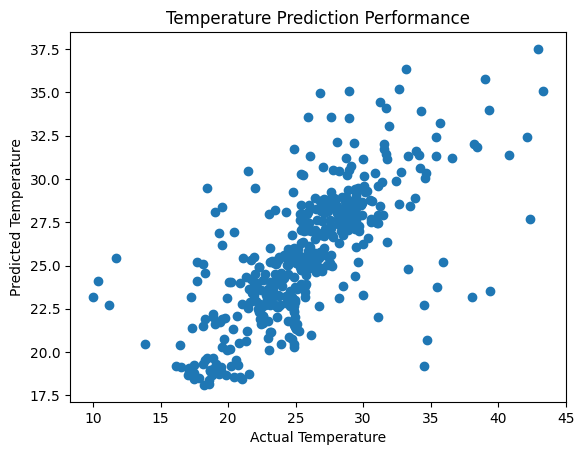

In [14]:
# Simple graph: actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Temperature Prediction Performance")
plt.savefig("temperature_graph.png")